Hey, so I wasn't able to finish the code and make it all neat. But if you need a working copy to, see below

In [10]:
#un comment the following lines to use sci-kit tips on the exercise (ie, shortcuts need to be taken):
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py

#from skimage import data
#from skimage.filters import threshold_otsu
#from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, watershed
from skimage.feature import peak_local_max
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from skimage.feature import canny

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import modules.oiplib as ip
import math

from scipy import ndimage as ndi

%matplotlib inline

#This line is specific for mac users with retina display
%config InlineBackend.figure_format = 'retina'

#from ipywidgets import interact, interactive, fixed, interact_manual
#from ipywidgets import widgets



In [11]:
def RegionLabelling(I):
    ## include edge removal
    label = 2
    u = I.shape[0]
    v = I.shape[1]
    img = np.copy(I).astype(np.int)
    for i in range(u):
        for j in range(v):
            if img[i,j] == 1:
                S = []
                S.append([i,j])
                ubound = img.shape[0]
                vbound = img.shape[1]
                while len(S) != 0:
                    a = S.pop(0)
                    x = a[0]
                    y = a[1]
                    if x < ubound and y < vbound and img[x,y] == 1:
                        img[x,y] = label
                        S.append([x+1, y])
                        S.append([x, y+1])
                        S.append([x, y-1])
                        S.append([x-1, y])         
                label = label + 1
    img[img == 2] = 0      
    return img

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1236df0d0>)

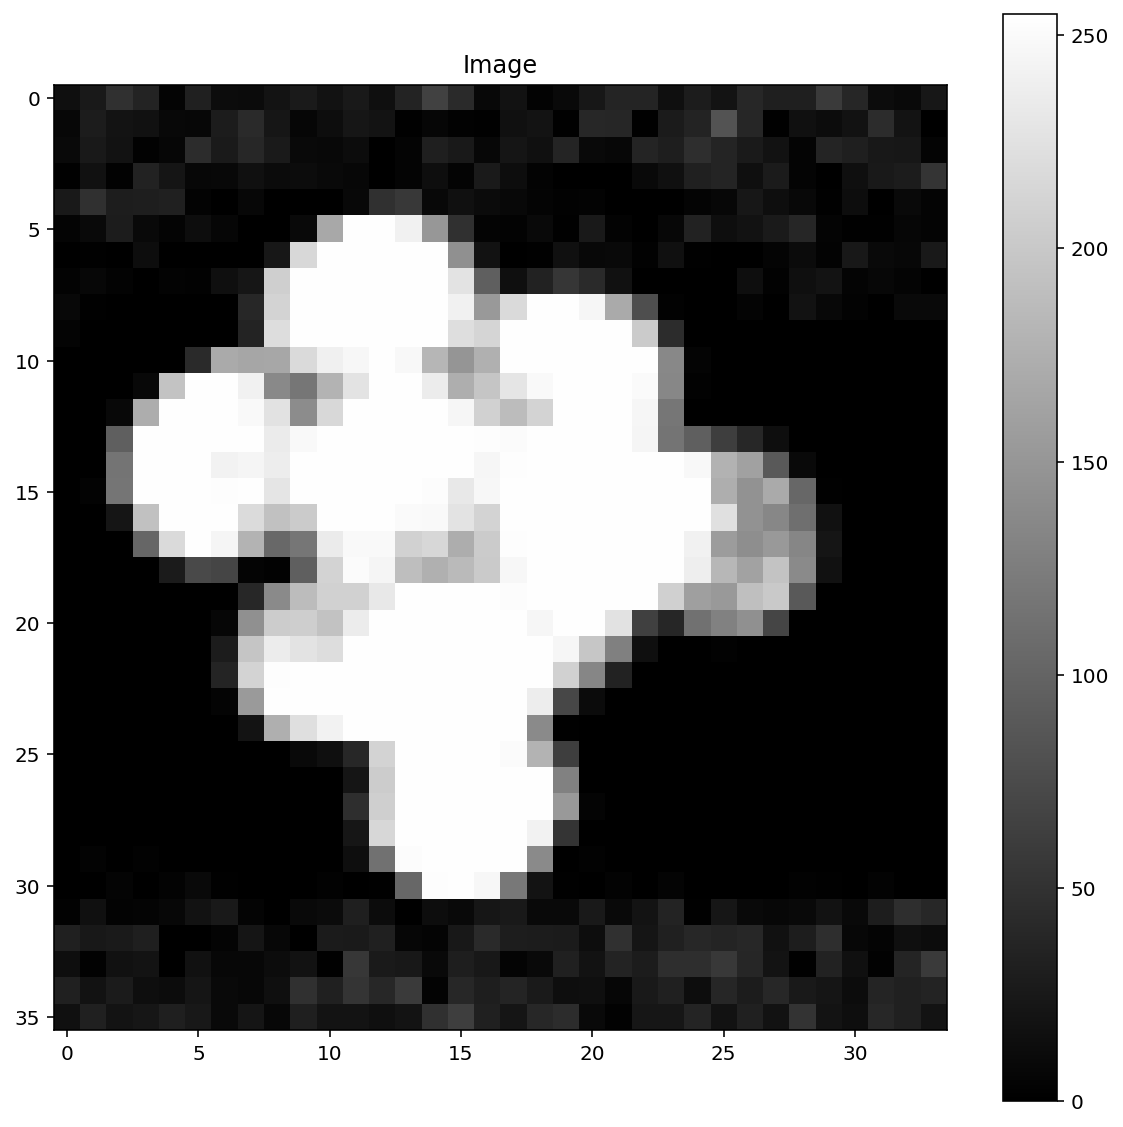

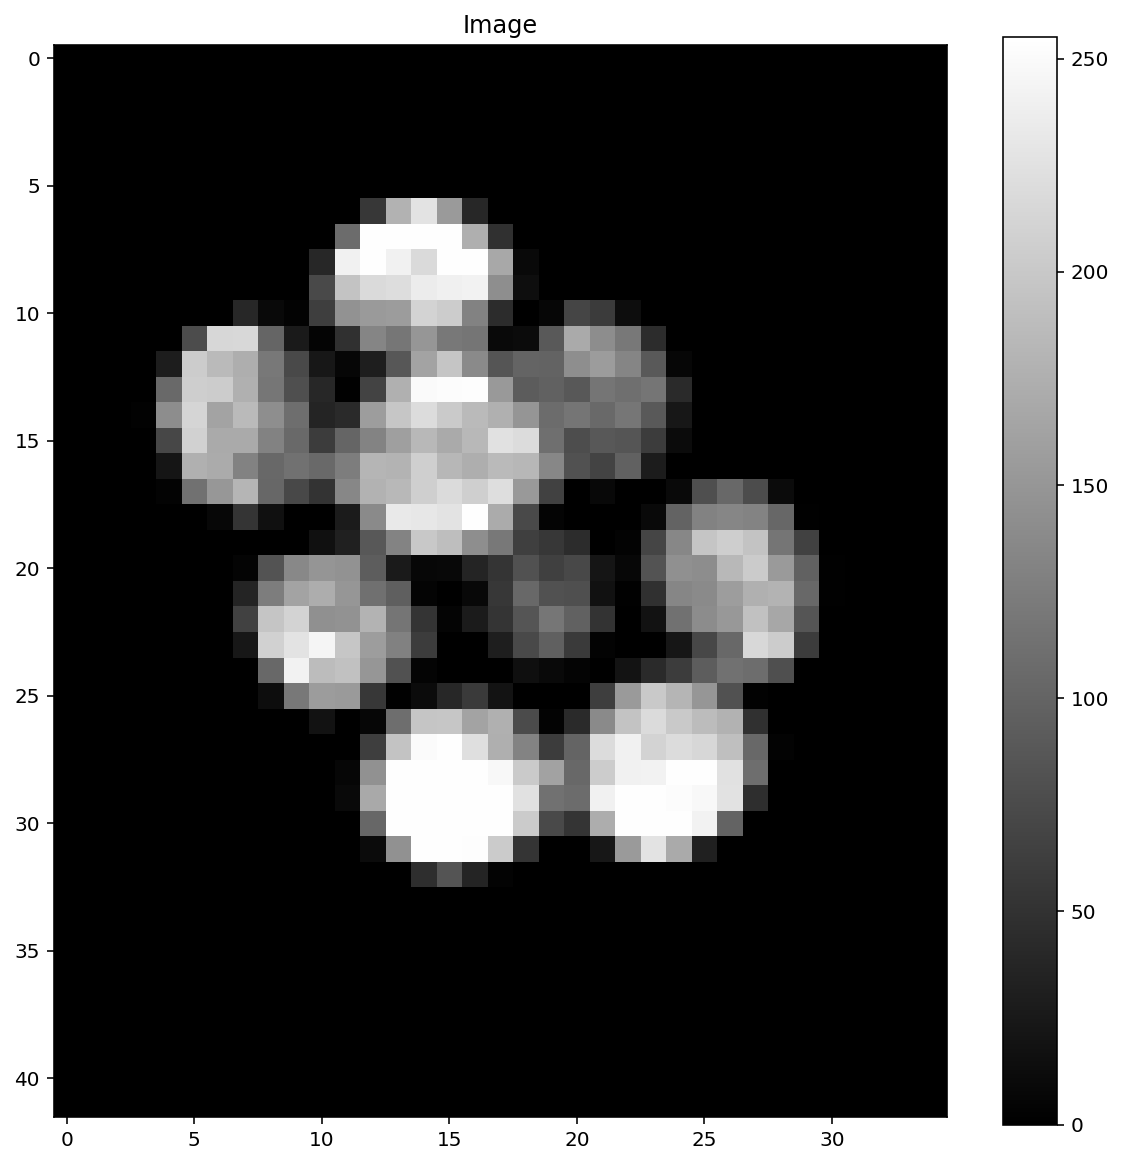

In [12]:
imgurl = '../images/cluster1.png'
imgurl2 = '../images/cluster2.png'
imgurl3 = '../images/cluster3.png'
img = ip.loadImage(imgurl)
img = ip.rgb2GrayLuminosity(img)
img2 = ip.loadImage(imgurl2)
img2 = ip.rgb2GrayLuminosity(img2)
img3 = ip.loadImage(imgurl3)
img3 = ip.rgb2GrayLuminosity(img3)
ip.showImage(img3, figsize=(10,10))
ip.showImage(img2, figsize=(10,10))


In [47]:
def obtainClusterEdges1(img):
    # start the process here   vvvv
    cont = ip.auto_contrast256(img)
    fil, Hx, Hy, SUM = ip.create_gaussian_filter(3,1)
    blur = ip.filter_image(cont,fil)
    lapsharp,edgeslap = ip.laplace_sharpen(blur, Filter='L4', Threshold=True, TVal= .01)
    #edgeslap = canny(cont,sigma=1.5)
    ip.showImage(edgeslap, vmax= np.max(edgeslap))
    thresh = ip.threshold_binary2(edgeslap,.15)
    closeskel = ip.img_close(thresh,ip.N4)
    return closeskel

def obtainClusterEdges2(img):
    thresh1 = ip.threshold_binary2(img, 40)
    lapsharp,edgeslap = ip.laplace_sharpen(thresh1, Filter='L4', Threshold=True, TVal= .01)
    #edgeslap = canny(cont,sigma=1.5)
    ip.showImage(edgeslap, vmax= np.max(edgeslap))
    thresh = ip.threshold_binary2(edgeslap,.15)
    closeskel = ip.img_close(thresh,ip.N4)
    ip.showImage(closeskel, vmax= np.max(closeskel))
    return closeskel


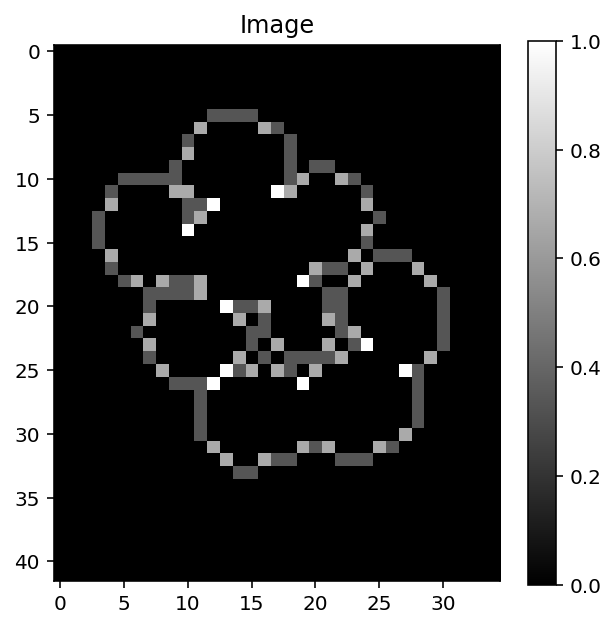

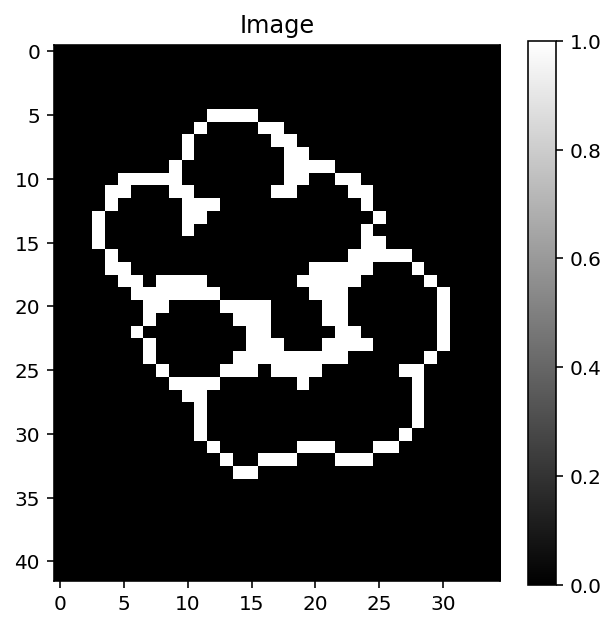

In [49]:
test = obtainClusterEdges2(img2)

In [50]:
ip.showImage()

TypeError: showImage() missing 1 required positional argument: 'uint8Img'

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d860f10>)

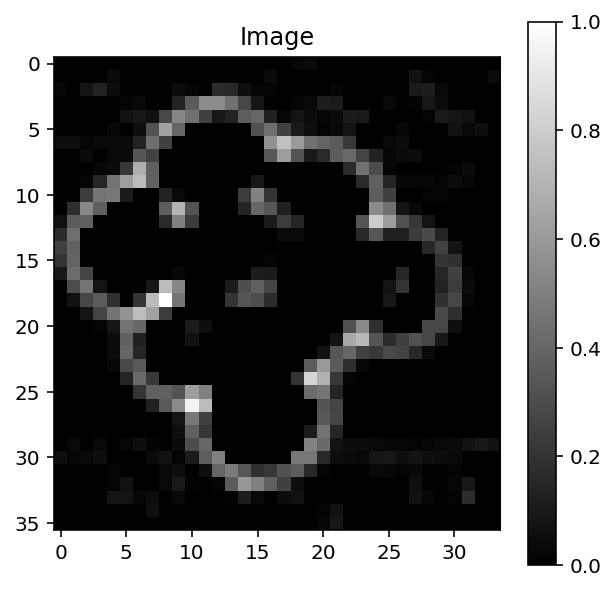

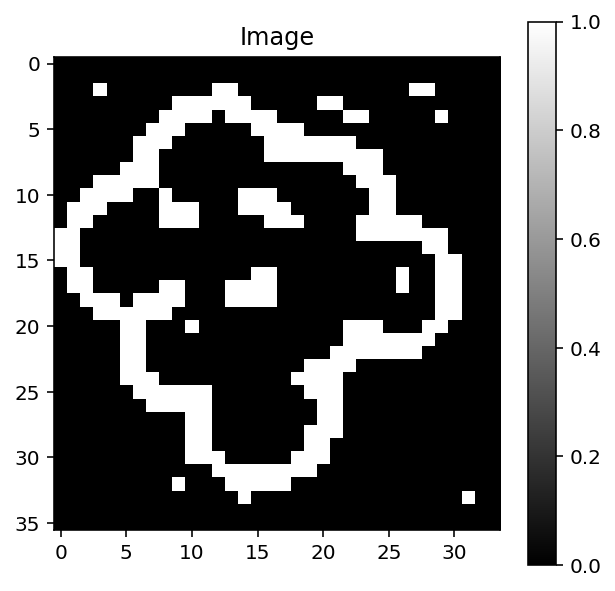

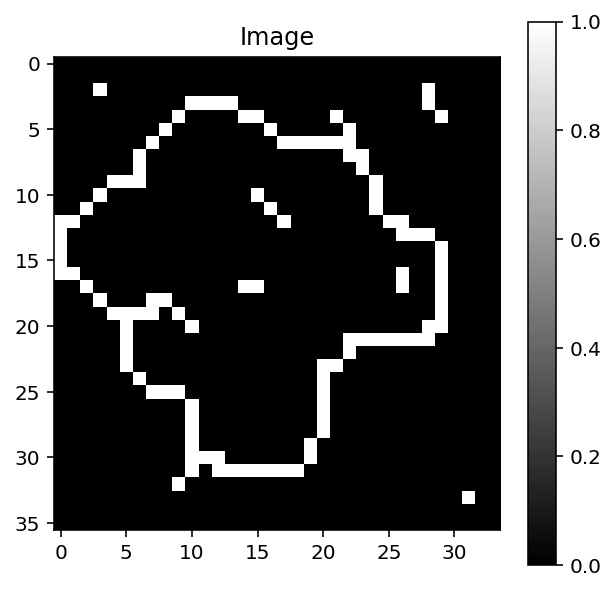

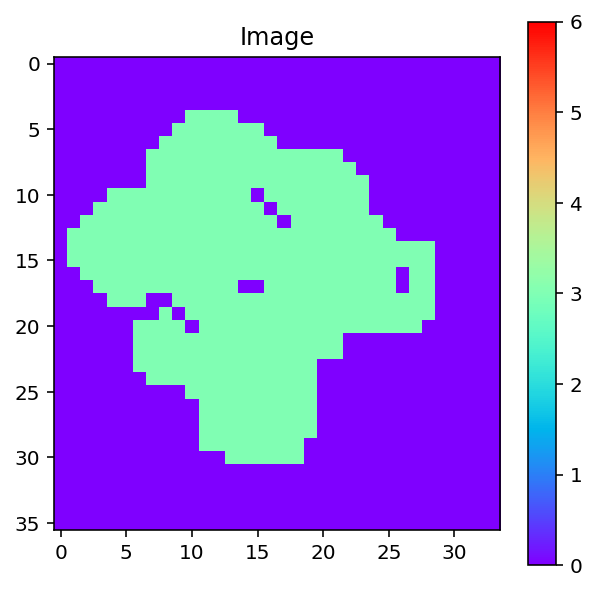

In [85]:

# start the process here   vvvv
cont = ip.auto_contrast256(img3)
fil, Hx, Hy, SUM = ip.create_gaussian_filter(3,1)
blur = ip.filter_image(cont,fil)
lapsharp,edgeslap = ip.laplace_sharpen(blur, Filter='L4', Threshold=True, TVal= .01)
#edgeslap = canny(cont,sigma=1.5)
ip.showImage(edgeslap, vmax= np.max(edgeslap))
thresh = ip.threshold_binary2(edgeslap,.1)
closeskel = ip.img_close(thresh,ip.N4)

eroded = ip.Thinning(closeskel)
tttt = RegionLabelling(1-eroded)
blank = np.zeros(tttt.shape)

ip.showImage(thresh, vmax = 1)

ip.showImage(eroded, vmax=1)

ip.showImage(tttt, vmax = 6, cmap = 'rainbow')

In [58]:
def countSize(labelled):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-58-7e29b663ef88>, line 2)

In [86]:

labeltobewatershed = 3
##change this value ^^  to begin watershed



i = labeltobewatershed
mask = tttt == i + blank


distance = ndi.distance_transform_edt(mask)


local_maxi = peak_local_max(distance, indices=False, footprint = np.ones((8,8)),labels=mask)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance,markers, mask=mask)
new = np.zeros(tttt.shape)
elementstooffset = tttt > labeltobewatershed
offset = np.copy(labels)
offset[labels!=0] = labels[labels!=0] + 2
addingfactor = len(np.unique(labels)) - 2
new[elementstooffset] = tttt[elementstooffset] + addingfactor
new = new + offset

#for this, 2 remains the "background" color

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b7ff6d0>)

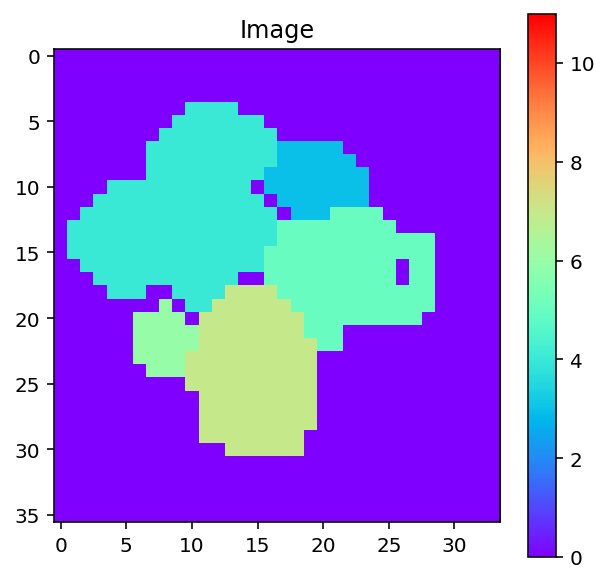

In [87]:
ip.showImage(new, vmax = 11, cmap ='rainbow')

In [84]:
np.unique(new) #use this to check how many new independent regions there are


array([ 0.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
new[30,15]

12.0

In [55]:
np.count_nonzero(np.unique(new))

6

In [23]:
#smallest bead doubled to check watershedding

labeltobewatershed = 3
### change this value 


i = labeltobewatershed
mask = tttt == i + blank
distance = ndi.distance_transform_edt(mask)
local_maxi = peak_local_max(distance, indices=False, footprint = np.ones((3,3)),labels=mask)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance,markers, mask=mask)
new = np.zeros(tttt.shape)
elementstooffset = tttt > labeltobewatershed
offset = np.copy(labels)
offset[labels!=0] = labels[labels!=0] + 2
addingfactor = len(np.unique(labels)) - 2
new[elementstooffset] = tttt[elementstooffset] + addingfactor
new = new + offset

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126230910>)

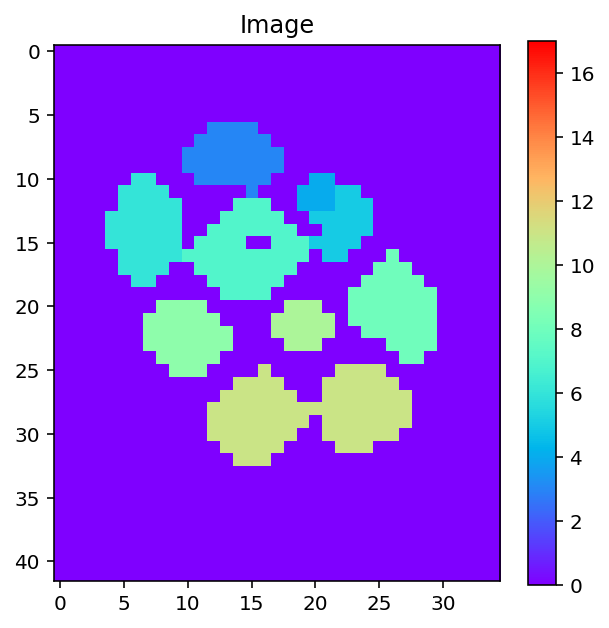

In [65]:
ip.showImage(new, vmax = 17, cmap ='rainbow')

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126472350>)

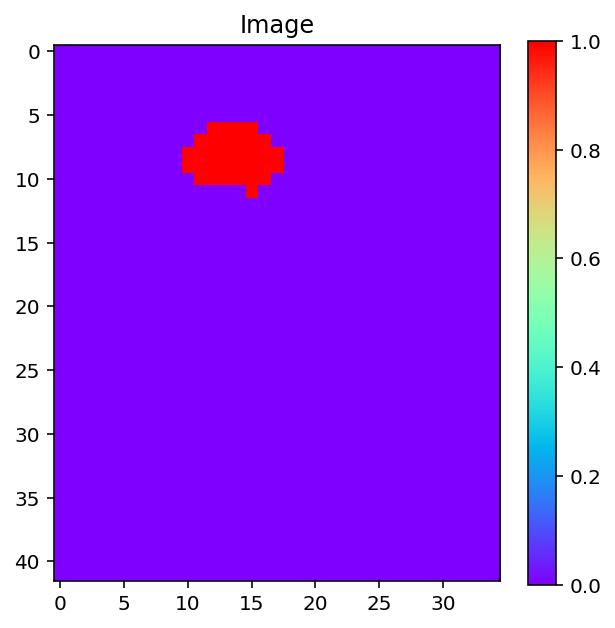

In [67]:
ip.showImage((new == 3), vmax = 1, cmap ='rainbow')

In [64]:

#we need to find size
#we need to find perimeter of a region
    

blank = np.zeros(invert.shape)

[tttt == i]



def labelAndWater(tttt):
    initiallabel = RegionLabelling(1-tttt)
    blank = np.zeros(invert.shape)

    labelstowatershed = []
    for i in np.unique(initiallabel)
        if (tttt == i)  roundness 
    
    
    while labeltowatershed < np.initial(
        distance = ndi.distance_transform_edt(mask)
        i = labeltobewatershed
        mask = invert ==  + blank
        local_maxi = peak_local_max(distance, indices=False, footprint = np.ones((8,8)),labels=mask)
        markers = ndi.label(local_maxi)[0]
        labels = watershed(-distance,markers, mask=mask)
        new = np.zeros(invert.shape)
        elementstooffset = invert > labeltobewatershed
        offset = np.copy(labels)
        offset[labels!=0] = labels[labels!=0] + 2
        addingfactor = len(np.unique(labels)) - 2
        new[elementstooffset] = invert[elementstooffset] + addingfactor
        new = new + offset
    return new